In [9]:
import numpy as np
import matplotlib.pyplot as plt



from pylab import *


from skrf.media import DistributedCircuit
from skrf import Frequency
from skrf import network
from skrf.network import *

from skrf import plotting 

import matplotlib.pyplot as plt

from IPython.display import Image  

%matplotlib inline

my_params = {
'figure.dpi': 240,
'figure.figsize': [10,10],
'figure.subplot.left' : 0.15,
'figure.subplot.right' : 0.9,
'figure.subplot.bottom' : 0.12,
'axes.titlesize' : 'medium',
'axes.labelsize' : 10 ,
'ytick.labelsize' :'small',
'xtick.labelsize' :'small',
'legend.fontsize' : 8, #small,
'legend.loc' : 'best',
'font.size' : 10.0,
'font.family' : 'serif',
'text.usetex' : False, # if you dont have latex
}
rcParams.update(my_params)

In [10]:
# funciones empleadas estan definidas en mysmith.py

import mysmith as mys

In [16]:
# impedancia de carga
RL = 1500

# componentes
C1   =  12.9e-12 
rpcs =  1 

L1  =  124e-09 
Qol =  100 

Cs =  10.3e-12

C2   =  30.3e-12 
rpcs =  1 

L2  =  129e-09 
Qol =  100 





## Frecuencia de trabajo
fo =  100e6
wo =  2*np.pi*fo
freq = Frequency(fo/1e6,100/1e6,1,'mhz')
print('fo = {:0.4} Hz'.format(float(freq.f) ) )

# impedancia de referencia
z0 = 50

# Perdidas capacitor
Qoc  = 1/(rpcs*wo*C1)
rpcp = rpcs *(1+ Qoc**2)

# perdidas inductor
rpls = (wo*L1)/Qol


fo = 1e+08 Hz


In [23]:
# Defino el valor de capacidad paralelo
C1d = np.linspace(C1/100, C1, 1000)

# Defino el valor de inductancia serie
L1d = np.linspace(L1*100, L1, 1000)

# Defino el valor de las perdidas
rps = np.linspace((rpcs+rpls)*10, (rpcs+rpls), 10)

# Defino el valor de capacidad paralelo
C1s = np.linspace(Cs*100, Cs, 1000)


# Defino el valor de capacidad paralelo
C2d = np.linspace(C2/100, C2, 1000)

# Defino el valor de inductancia serie
L2d = np.linspace(L2*100, L2, 1000)

## Sin perdidas !
nw1 =  mys.ZL(freq,RL,z0)
nw   = nw1 

print('ZL')    
mys.printZ(nw.z[-1,0,0])
print('')


for c in C1d:
    nwa = mys.Zparal(freq,1j*mys.Xc(freq.f[0],c),z0)
    nw2 = cascade(nwa,nw1)
    nw  = stitch(nw,nw2 )
    
print('ZL')    
mys.printZ(nw.z[-1,0,0])

for l in L1d:
    nwa = mys.Zparal(freq,1j*mys.Xl(freq.f[0],l),z0)
    nw3 = cascade(nwa,nw2)
    nw  = stitch(nw,nw3 )
    
print('ZL')    
mys.printZ(nw.z[-1,0,0])


for c in C1s:
    nwa = mys.Yserie(freq,1j*mys.Bc(freq.f[0],c),z0)
    nw4 = cascade(nwa,nw3)
    nw  = stitch(nw,nw4 )
    
print('')    
mys.printZ(nw.z[-1,0,0])


for c in C2d:
    nwa = mys.Zparal(freq,1j*mys.Xc(freq.f[0],c),z0)
    nw5 = cascade(nwa,nw4)
    nw  = stitch(nw,nw5 )
    
print('ZL')    
mys.printZ(nw.z[-1,0,0])

for l in L2d:
    nwa = mys.Zparal(freq,1j*mys.Xl(freq.f[0],l),z0)
    nw6 = cascade(nwa,nw5)
    nw  = stitch(nw,nw6 )
    
print('ZL')    
mys.printZ(nw.z[-1,0,0])


ZL
R = 1.500e+03 ohms
X = 0.000e+00 ohms
Q = 0.000 

ZL
R = 1.008e+01 ohms
X = -1.225e+02 ohms
Q = 12.158 
ZL
R = 2.922e+01 ohms
X = 2.073e+02 ohms
Q = 7.095 

R = 2.922e+01 ohms
X = 5.279e+01 ohms
Q = 1.807 
ZL
R = 9.441e+01 ohms
X = -5.337e+01 ohms
Q = 0.565 
ZL
R = 6.408e+01 ohms
X = 6.227e+01 ohms
Q = 0.972 


0.97178447266549828

RL  = 1500.000 ohms
Zin = 64.076+62.268j ohms


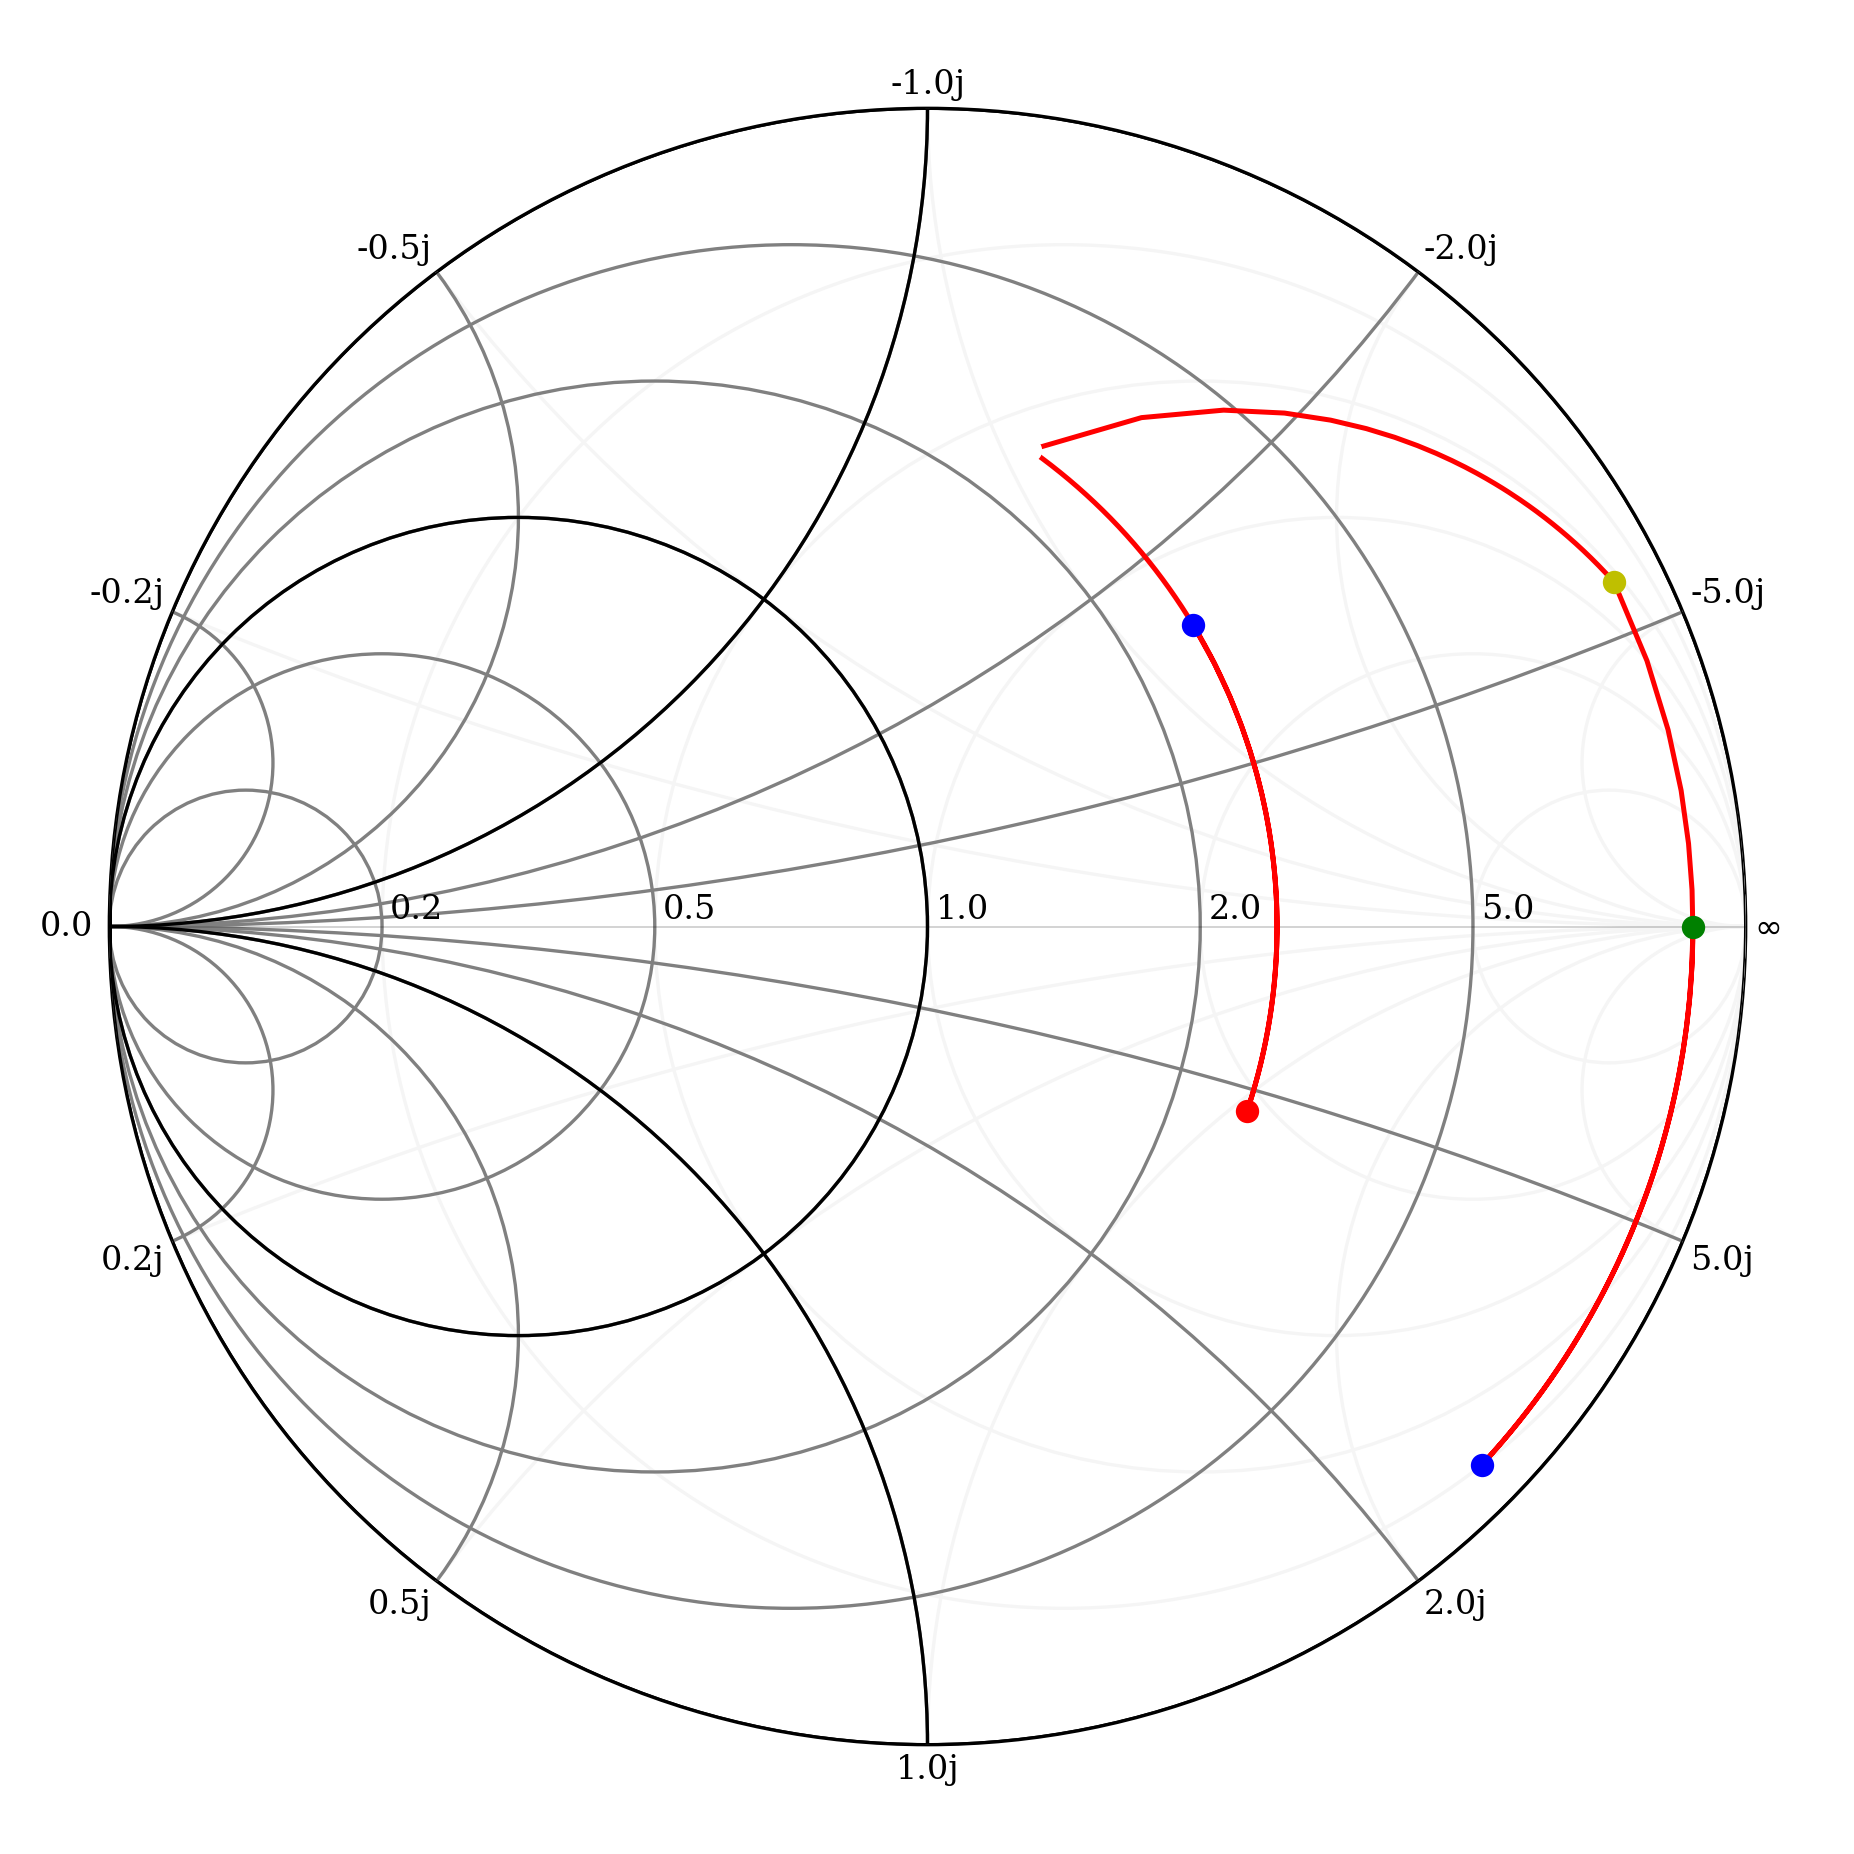

In [29]:
nw.plot_s_smith(m=0,n=0,color='r',draw_labels=True,show_legend = False, chart_type='yz')
#plotting.smith(draw_vswr=[100.0] )

nw1.plot_s_smith(m=0,n=0,color='g',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw2.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o') 
nw3.plot_s_smith(m=0,n=0,color='y',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw4.plot_s_smith(m=0,n=0,color='w',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw5.plot_s_smith(m=0,n=0,color='r',draw_labels=True,show_legend = False, chart_type='yz',marker='o')
nw6.plot_s_smith(m=0,n=0,color='b',draw_labels=True,show_legend = False, chart_type='yz',marker='o')

print('RL  = {:1.3f} ohms'.format(nw.z[0,0,0].real))
print('Zin = {:1.3f} ohms'.format(nw.z[-1,0,0]))